In [5]:
# Import Modules
import sys,os
sys.path.append(os.getcwd())

from model_clarify import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pickle

In [6]:
# Define target feature
TARGET_COLUMN = 'cat_rt'

# read in the model and data for this tutorial
model = joblib.load('test/RandomForest.pkl')
data  = pd.read_csv('test/example_data.csv')

# get actual target data
targets = data[TARGET_COLUMN].values

# only want to use these columns below
cols_to_use = ['dllwave_flux', 'dwpt2m', 'fric_vel', 'gflux', 'high_cloud',
            'lat_hf', 'low_cloud', 'mid_cloud', 'sat_irbt', 'sens_hf',
            'sfcT_hrs_ab_frez', 'sfcT_hrs_bl_frez', 'sfc_rough', 'sfc_temp',
            'swave_flux','temp2m', 'tmp2m_hrs_ab_frez', 'tmp2m_hrs_bl_frez',
            'tot_cloud', 'uplwav_flux','vbd_flux', 'vdd_flux','wind10m',
            'date_marker', 'urban','rural','d_ground','d_rad_d','d_rad_u',
            'hrrr_dT']

# get predictor subset of dataframe (only the predictors used in training the model)
data = data[cols_to_use]

# testing purposes
# numpy_data     = data.values
# feature_names  = data.columns

# always the default here
classification = True

# #train a RF real quick
# model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', 
#                                 class_weight='balanced', criterion='entropy',n_jobs=-1)
# model.fit(data, targets)
# joblib.dump(model, 'test/RandomForest.pkl')

# Initializing ModelClarify

To initialize `ModelClarify`, you need a model object (e.g., a trained sci-kit learn model object) or a list of model objects and a `pandas.Dataframe` of the training examples and targets. 
If it is the case that `examples` and `targets` are arrays, then you must provide the feature names so that the data can be converted to a `pandas.DataFrame`. Now we can explore the various functions and plotting availabe in `ModelClarify`. 

In [7]:
myInterpreter = ModelClarify(model=model, 
                             examples=data, 
                             targets=targets, 
                             classification=True)

# Permutation Importance

The permutation importance calculations are performed by a stripped-down version of PermutationImportance (see https://permutationimportance.readthedocs.io/en/latest/ for additional details). In this example, we want the top 5 predictors as determined by the multipass permutation importance method (SOURCE). Additionally, we are using the Area under the Curve (AUC) as our error metric. 

In [ ]:
#returns a dictionary of top 5 predictors
results = myInterpreter.permutation_importance(n_multipass_vars=10, evaluation_fn='auc', nbootstrap=10)
important_vars = list(results['RandomForestClassifier'].retrieve_multipass().keys())
print(results['RandomForestClassifier'].retrieve_multipass())

Using 1 of processors to compute importance...
Starting on the important variable 0 out of 10...
Starting on the important variable 1 out of 10...
Starting on the important variable 2 out of 10...
Starting on the important variable 3 out of 10...


In [ ]:
# This commentd out code handles saving and loading the results of the 
# the permutation importance result object. 
# with open('permutation_importance_results.pkl', 'wb') as pkl_file:
#    pickle.dump(importance_obj)
# 
# with open('permutation_importance_results.pkl', 'rb') as pkl_file:
#    importance_obj = pickle.load(pkl_file)
myInterpreter.plot_importance(multipass=True, 
                              metric = "Training AUC",
                              num_vars_to_plot=10)

# Partial Dependence Plots

In [ ]:
myInterpreter.run_pd(features=important_vars, nbootstrap=10, subsample=1.0)
fig, axes = myInterpreter.plot_pd()

# Accumulated Local Effect

In [ ]:
myInterpreter.run_ale(features=important_vars, nbootstrap=10, subsample=1.0)
fig, axes = myInterpreter.plot_ale()

# Feature Contributions (Random Forest Only)

For random forest, it is possible to breakdown a prediction into a series of contributions from the predictors. 

In [4]:
out_dict = myInterpreter.run_tree_interpreter(performance_based=True, n_examples=100)
print(out_dict)

Processing hits...
Interpreting 36 examples...
Processing false_alarms...
Interpreting 64 examples...
Processing misses...
Interpreting 36 examples...
Processing corr_negs...
Interpreting 64 examples...
{'RandomForestClassifier': {'hits': {'Bias': {'Mean Value': None, 'Mean Contribution': 50.0}, 'uplwav_flux': {'Mean Value': 259.322573767768, 'Mean Contribution': 9.202777777777778}, 'sfc_temp': {'Mean Value': -10.481701321072048, 'Mean Contribution': 7.364722222222222}, 'temp2m': {'Mean Value': -9.258551279703775, 'Mean Contribution': 5.044444444444444}, 'sfcT_hrs_bl_frez': {'Mean Value': 91.88888888888889, 'Mean Contribution': 3.344722222222222}, 'tmp2m_hrs_bl_frez': {'Mean Value': 210.19444444444446, 'Mean Contribution': 2.549444444444445}, 'sfcT_hrs_ab_frez': {'Mean Value': 0.027777777777777776, 'Mean Contribution': 2.4499999999999997}, 'tmp2m_hrs_ab_frez': {'Mean Value': 1.8888888888888888, 'Mean Contribution': 2.089444444444444}, 'dwpt2m': {'Mean Value': -13.185840606689453, 'Mean

hits
false_alarms
misses
corr_negs


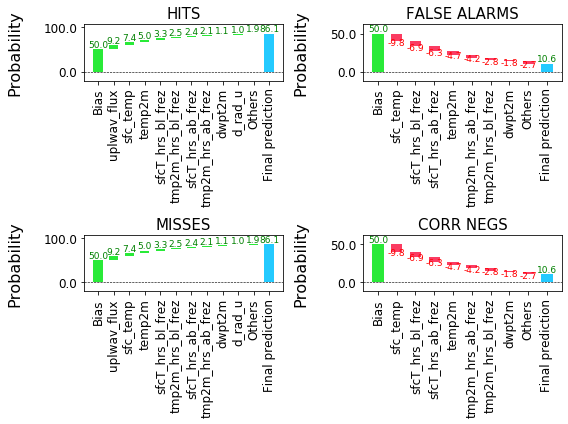

In [5]:
fig = myInterpreter.plot_tree_interpreter()

# Saving the figures
c_plot.save_figure(fig, fname, bbox_inches="tight", dpi=300, aformat="png")